Matrix shape (17289, 2)
Initial time:  -107.65092551579168
Final time:  6888.326661934464
Matrix shape (8470, 2)
Initial time:  5124.341191938789
Final time:  6603.105432371069


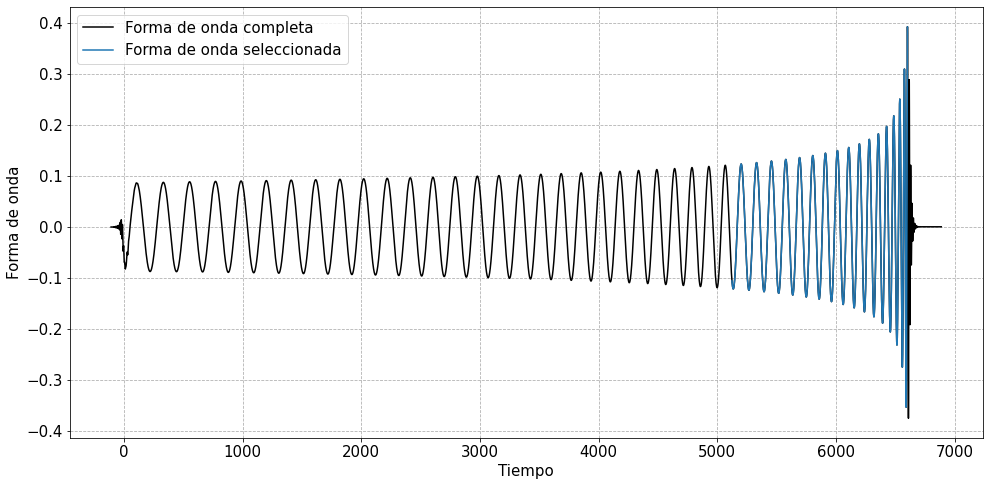

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

waveID = "SXS:BBH:0211"
wf = pd.read_csv("../01_data/01_input/02_case_2/" + waveID + "/waveform_real.txt", sep=" ", names=["time", "wf"])
print('Matrix shape', wf.shape)
print('Initial time: ', wf['time'][0])
print('Final time: ', wf['time'].iloc[-1])

fig, ax = plt.subplots(1,1, figsize=(14,7))

# eliminate first 30% of data
low_lim = np.round(wf.shape[0] * 0.345)
up_lim = wf['wf'].argmax()
wf_short = wf[(wf.index > low_lim) & (wf.index < up_lim)]

print('Matrix shape', wf_short.shape)
print('Initial time: ', wf_short['time'].iloc[0])
print('Final time: ', wf_short['time'].iloc[-1])

ax.plot(wf['time'], wf['wf'], "k-", label="Forma de onda completa");
ax.set_xlabel('Tiempo')
ax.set_ylabel('Forma de onda')
ax.plot(wf_short['time'], wf_short['wf'], label="Forma de onda seleccionada");
plt.grid(linestyle="dashed")
plt.legend()
plt.tight_layout()
fig.savefig("../01_data/01_input/02_case_2/example_wf_section.png")
fig.savefig("../01_data/01_input/02_case_2/example_wf_section.pdf")

Matrix shape (17289, 2)
Initial time:  -107.65092551579168
Final time:  6888.326661934464
Matrix shape (8470, 2)
Initial time:  5124.341191938789
Final time:  6603.105432371069


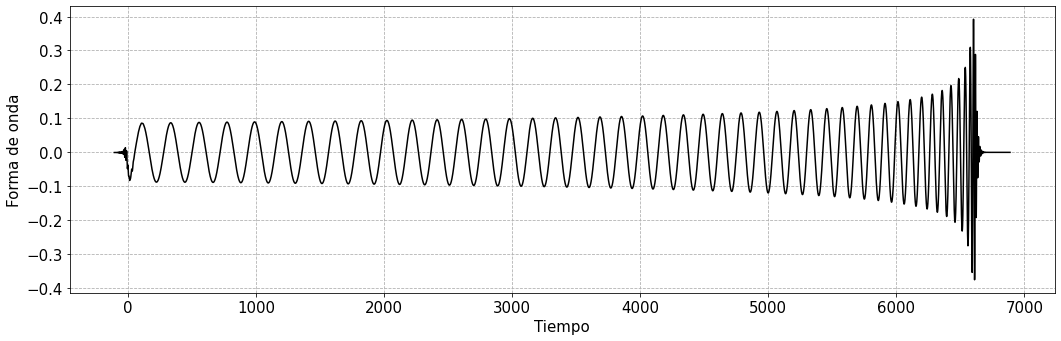

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# sns.set_context(font_scale=1.25)
sns.set_context(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})


waveID = "SXS:BBH:0211"
wf = pd.read_csv("../01_data/01_input/02_case_2/" + waveID + "/waveform_real.txt", sep=" ", names=["time", "wf"])
print('Matrix shape', wf.shape)
print('Initial time: ', wf['time'][0])
print('Final time: ', wf['time'].iloc[-1])

fig, ax = plt.subplots(1,1, figsize=(15,5))

# eliminate first 30% of data
low_lim = np.round(wf.shape[0] * 0.345)
up_lim = wf['wf'].argmax()
wf_short = wf[(wf.index > low_lim) & (wf.index < up_lim)]

print('Matrix shape', wf_short.shape)
print('Initial time: ', wf_short['time'].iloc[0])
print('Final time: ', wf_short['time'].iloc[-1])

sns.lineplot(data=wf, x="time", y="wf", color="k")
# ax.plot(wf['time'], wf['wf'], "k-", label="Onda completa");
ax.set_xlabel('Tiempo')
ax.set_ylabel('Forma de onda')
plt.grid(linestyle="dashed")
plt.tight_layout()
fig.savefig("../01_data/01_input/02_case_2/example_wf.pdf")
fig.savefig("../01_data/01_input/02_case_2/example_wf.png")

In [ ]:
os.getcwd()

'/home/rubenbalbastre/Escritorio/TFM/App 1. Cosmology/PINN/project/01_project/02_logic'

In [4]:
df = pd.read_csv("../01_data/02_output/02_case_2/original/solutions/SXS1_losses.csv")
df.head()

,niter,test_name,train_losses,test_losses,train_metrics,test_metrics
0,1,original/,0.022516,0.017304,0.279390,0.131542
1,2,original/,0.022387,0.017459,0.275149,0.131300
2,3,original/,0.022346,0.017416,0.275050,0.131270
3,4,original/,0.022219,0.017287,0.274656,0.131168
4,5,original/,0.036991,0.017298,0.383393,0.131188


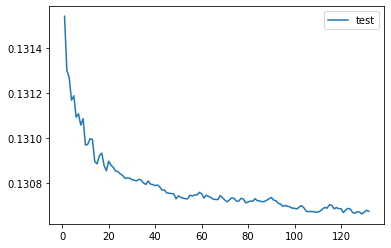

In [5]:
df = df[df["test_name"] == "original/"]
plt.plot(df['niter'], df['test_metrics'], label="test")
# plt.plot(df['niter'], df['train_metrics'], label="train")
plt.legend();

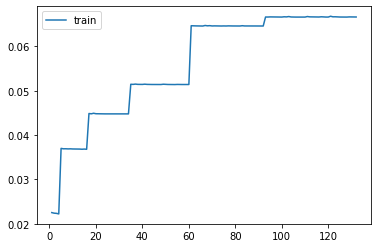

In [7]:
df = df[df["test_name"] == "original/"]
# plt.plot(df['niter'], df['test_losses'], label="test")
plt.plot(df['niter'], df['train_losses'], label="train")
plt.legend();